In [1]:
#ojo espetrograma y escalograma cwt uso la misma escalapara cada audio

# trabajo completo de analisis de audios

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler as SS
from sklearn.decomposition import PCA
import IPython.display as ipd
import scipy.fft
import os
from pathlib import Path

### Formación de la matriz



In [3]:
path=r"C:\Users\migue\OneDrive\Escritorio\Semestre 7\Metodos de machine learning\semana 2 a 4 audios y espectros\Audios Machine Learning"
wav_files = glob.glob(path+'\*.wav') #importando cada nombre 

wav_files.remove('C:\\Users\\migue\\OneDrive\\Escritorio\\Semestre 7\\Metodos de machine learning\\semana 2 a 4 audios y espectros\\Audios Machine Learning\\9.wav')
wav_files.remove('C:\\Users\\migue\\OneDrive\\Escritorio\\Semestre 7\\Metodos de machine learning\\semana 2 a 4 audios y espectros\\Audios Machine Learning\\14.wav')
# se removieron los audios 14 y 9
print(f'lista de audios cargados:{wav_files}')

mat=[]#lista con cada una de las filas un audio


for j in range(0,len(wav_files)):
    #print(wav_files[j],'\n')
    srate,data=waves.read(wav_files[j]) # importamos el audio y formamos un vector de este, usando el canal 1 del audio en estéreo se recortara.
    length = data.shape[0] / srate
    time = np.linspace(0., length, data.shape[0])
    #print(f'dimension de audio original {data.shape[0]}')

    data1=data[:,1][43000:172000] # recortamos el vector de audio obtenido debido a que al inicio y al final de este el sonido es ruido o silencio.
    length1 =len(data1)/ srate    # el audio se recorta 1/4 tanto al inicio como al final 
    time1 = np.linspace((43000)/srate, length1, data1.shape[0])
    #print(f'dimension de audio cortado {data1.shape[0]}')

    #print('Pre-proceso realizado')

    mat.append(data1)

    '''# cuadro comentado de las graficas de cada uno de los audios para poder comparar el original y el recortado
    plt.plot(time, data[:, 1], label="orginal")
    plt.plot(time1+0.578, data1,  label="cortado")

    plt.legend()
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.show()
    '''


print('-----------------------------------------------------------')
matrix=np.stack( mat, axis=0 ) #formación de la matriz cuyas filas son los archivos de audio, como array

#for k in range(0,len(mat)): #verificar dimensiones de los vectores
    #print(len(mat[k]))
print(matrix)
print(f'\nDimensiones de la matriz{matrix.shape}')

lista de audios cargados:['C:\\Users\\migue\\OneDrive\\Escritorio\\Semestre 7\\Metodos de machine learning\\semana 2 a 4 audios y espectros\\Audios Machine Learning\\1.wav', 'C:\\Users\\migue\\OneDrive\\Escritorio\\Semestre 7\\Metodos de machine learning\\semana 2 a 4 audios y espectros\\Audios Machine Learning\\10.wav', 'C:\\Users\\migue\\OneDrive\\Escritorio\\Semestre 7\\Metodos de machine learning\\semana 2 a 4 audios y espectros\\Audios Machine Learning\\11.wav', 'C:\\Users\\migue\\OneDrive\\Escritorio\\Semestre 7\\Metodos de machine learning\\semana 2 a 4 audios y espectros\\Audios Machine Learning\\12.wav', 'C:\\Users\\migue\\OneDrive\\Escritorio\\Semestre 7\\Metodos de machine learning\\semana 2 a 4 audios y espectros\\Audios Machine Learning\\13.wav', 'C:\\Users\\migue\\OneDrive\\Escritorio\\Semestre 7\\Metodos de machine learning\\semana 2 a 4 audios y espectros\\Audios Machine Learning\\15.wav', 'C:\\Users\\migue\\OneDrive\\Escritorio\\Semestre 7\\Metodos de machine learning\

### Analisis de valores singulares

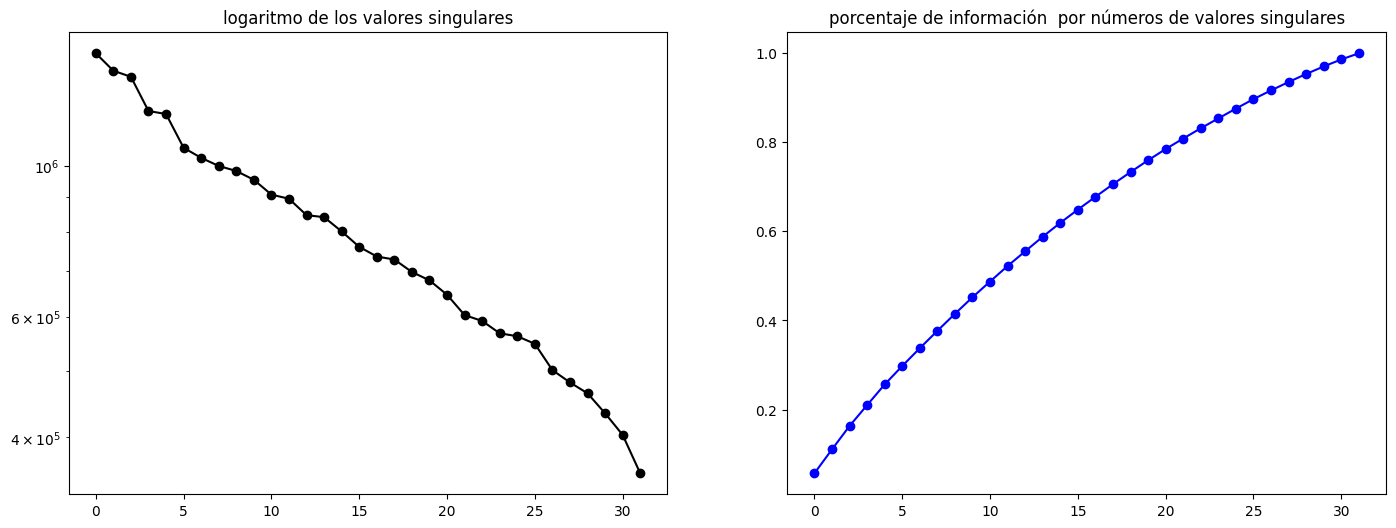

In [4]:
U,S,VT=np.linalg.svd(matrix, full_matrices=False)
fig = plt.figure(figsize=(17,6))
ax1=fig.add_subplot(121)
ax1.set_title('logaritmo de los valores singulares')
ax1.semilogy(S,'-o',color='k')
ax2 = fig.add_subplot(122)
ax2.set_title('porcentaje de información  por números de valores singulares')
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='b')

### Normalizacion usando z-score
$$x_z = \frac{x-\mu}{\sigma}$$
se realizó la normalización para cada fila de la matriz

In [5]:
'''
# Calculate the mean and standard deviation for each row
row_means = np.mean(matrix, axis=1)
row_stdevs = np.std(matrix, axis=1)

# Subtract the mean from each element in the row
matrix_centered = matrix - row_means.reshape(-1, 1)

# Divide each element in the row by the standard deviation
matrix_zscored = matrix_centered / row_stdevs.reshape(-1, 1)

print(matrix_zscored)
'''

'\n# Calculate the mean and standard deviation for each row\nrow_means = np.mean(matrix, axis=1)\nrow_stdevs = np.std(matrix, axis=1)\n\n# Subtract the mean from each element in the row\nmatrix_centered = matrix - row_means.reshape(-1, 1)\n\n# Divide each element in the row by the standard deviation\nmatrix_zscored = matrix_centered / row_stdevs.reshape(-1, 1)\n\nprint(matrix_zscored)\n'

In [6]:
scaler = SS()
Nmatrix = scaler.fit_transform(matrix)

### Etiquetas de cada audio

In [7]:
wavs=[
    '1','10','11','12','13','15','16','17','18','19',
    '2','20','21','22','23','24','25','26','27','28','29',
    '3','30','31','32','33','34','4','5','6','7','8'
    ]

print(f'waves len {len(wavs)}')
#por sexo
sx=["M","H","H","M","H","H","H","Ha","M","H",
    "M","H","M","H","H","H","H","H","H","H",
    "M","H","H","H","H","H","M",
    "H","H","H","H","H"]


waves len 32


### Descomposicion en componentes principales

[[-4.15069351e-04 -5.06928157e-04 -6.29671697e-04 ...  2.55068272e-04
   1.94963100e-04  8.37305647e-05]
 [-3.45402418e-03 -3.52672520e-03 -3.65027273e-03 ... -4.41999844e-03
  -4.60223790e-03 -4.95512485e-03]
 [ 1.63849215e-03  1.78913194e-03  1.88161926e-03 ... -2.36777738e-03
  -2.38796543e-03 -2.67708437e-03]
 ...
 [ 2.63463862e-03  2.65701090e-03  2.80855743e-03 ... -2.39650545e-03
  -2.20333047e-03 -2.27229882e-03]
 [ 5.86018530e-04  4.20528127e-04  1.28199195e-04 ... -4.10439057e-04
  -2.88623867e-04 -5.83734030e-04]
 [ 2.22560810e-04  3.76525708e-04  7.29879842e-04 ... -1.37238703e-03
  -1.29463705e-03 -1.12520553e-03]]
(8, 129000)


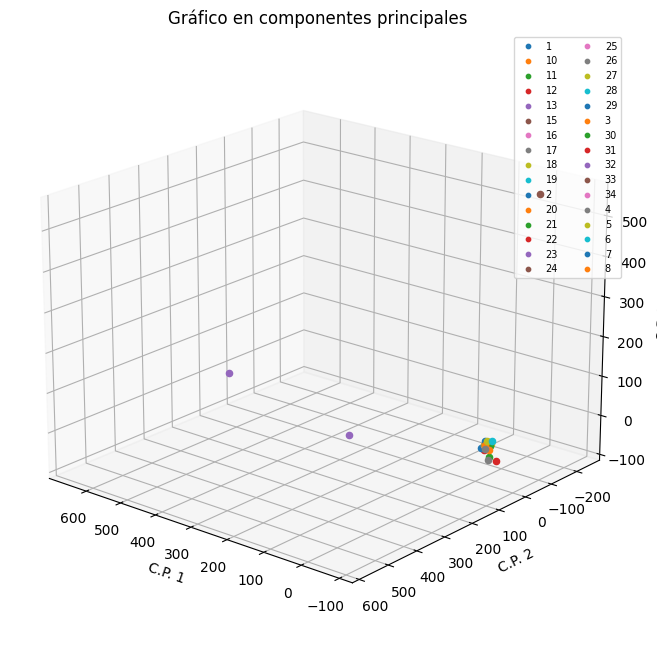

In [8]:
pca=PCA(8)
pca.fit(Nmatrix)
print(pca.components_)
print(pca.components_.shape)

fig0=plt.figure(figsize=(33, 8))
ax=fig0.add_subplot(111,projection='3d',title='Gráfico en componentes principales')

for j in range (matrix.shape[0]):
    #PROYECCIONES DE CADA ARCHIVO DE AUDIO SOBRE COMPONENTES PRINCIPALES
    x = pca.components_[0] @ Nmatrix[j,:].T #cambiando el valor numerico referente al vector de la matriz VT podemos cambiar la proyeccion sobre una componente principal
    y = pca.components_[1]@ Nmatrix[j,:].T
    z = pca.components_[2] @ Nmatrix[j,:].T

    ax.scatter(x,y,z,marker='o', label=wavs[j])

ax.legend(loc='upper right',ncols=2,fontsize=7,markerscale=0.7)
ax.set_xlabel('C.P. 1')
ax.set_ylabel('C.P. 2')
ax.set_zlabel('C.P. 3')


#for angle in range(0,360):
ax.view_init(20,130 )
#plt.draw()
#plt.pause(.01)
plt.show()

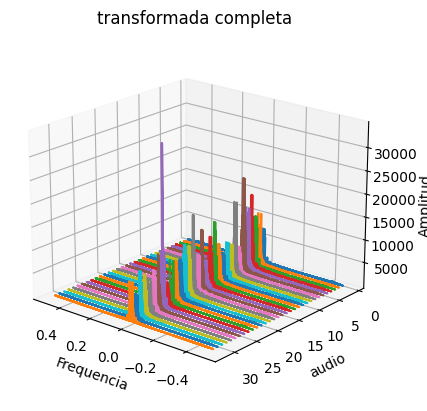

"\nn = fftm.shape[1]\nfftm=fftm[:,:n//2]\nprint(fftm)\nfftm=np.stack( FFT, axis=0 )\n\nplt.style.use('_mpl-gallery')\n\nfigf=plt.figure(figsize=(33, 8))\naf=figf.add_subplot(111,projection='3d',title='furier')\n\nfor o in range(fftm.shape[0]):\n    X = fftm[:,o]#filas\n    Y = np.linspace(0,fftm.shape[1],fftm.shape[1])#columnas\n    Z = np.linspace(0,fftm.shape[0],fftm.shape[0])\n    ax.scatter(X,Y,Z,marker='o', label=wavs[j])\n"

In [9]:
FuTr=[]

for n in range(len(mat)):
    furier=scipy.fft.fft(Nmatrix[n])
    afurier=np.absolute(furier)
    FuTr.append(afurier)

freq=scipy.fft.fftfreq(len(Nmatrix[0]))

#plt.plot(freq,FuTr[0])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d',title='transformada completa')

plane=[]
for m in range(len(Nmatrix)):
    aux=[]
    for i in range(len(Nmatrix[0])):
        aux.append(m+1)

    plane.append(aux)


for j in range(len(Nmatrix)):
    ax.plot(freq,plane[j],FuTr[j])
    
# Set the labels and title of the plot
ax.set_xlabel("Frequencia")
ax.set_ylabel("audio")
ax.set_zlabel("Amplitud")

ax.view_init(20,130 )


plt.show()


'''
n = fftm.shape[1]
fftm=fftm[:,:n//2]
print(fftm)
fftm=np.stack( FFT, axis=0 )

plt.style.use('_mpl-gallery')

figf=plt.figure(figsize=(33, 8))
af=figf.add_subplot(111,projection='3d',title='furier')

for o in range(fftm.shape[0]):
    X = fftm[:,o]#filas
    Y = np.linspace(0,fftm.shape[1],fftm.shape[1])#columnas
    Z = np.linspace(0,fftm.shape[0],fftm.shape[0])
    ax.scatter(X,Y,Z,marker='o', label=wavs[j])
'''


Dimensiones de la matriz de furier (32, 129000)

Dimensiones de la matriz de furier media (32, 64500)
64500


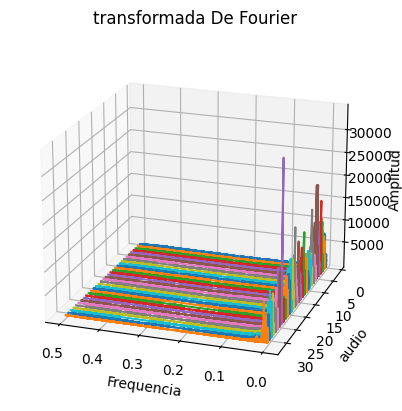

In [10]:
fftm=np.stack( FuTr, axis=0 )
print(f'\nDimensiones de la matriz de furier {fftm.shape}')
n = fftm.shape[1]

fftm=fftm[:,:n//2]
print(f'\nDimensiones de la matriz de furier media {fftm.shape}')

n =len(freq)//2
freqa=freq[:n]


plane=[]
for m in range(len(fftm)):
    aux=[]
    for i in range(len(fftm[0])):
        aux.append(m+1)

    plane.append(aux)

print(len(freqa))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d',title='transformada De Fourier')


for j in range(len(Nmatrix)):
    ax.plot(freqa,plane[j],fftm[j])
    
# Set the labels and title of the plot
ax.set_xlabel("Frequencia")
ax.set_ylabel("audio")
ax.set_zlabel("Amplitud")

ax.view_init(20,109 )

plt.show()


Dimensiones de la matriz de furier media (32, 4000)
4000


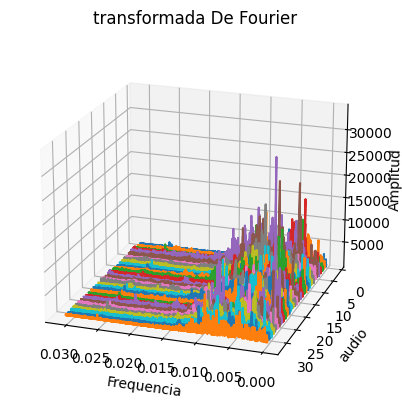

In [11]:
n =4000

fftm=fftm[:,:n]
print(f'\nDimensiones de la matriz de furier media {fftm.shape}')


freqa=freq[:n]


plane=[]
for m in range(len(fftm)):
    aux=[]
    for i in range(len(fftm[0])):
        aux.append(m+1)

    plane.append(aux)

print(len(plane[2]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d',title='transformada De Fourier')


for j in range(len(fftm)):
    ax.plot(freqa,plane[j],fftm[j])
    
# Set the labels and title of the plot
ax.set_xlabel("Frequencia")
ax.set_ylabel("audio")
ax.set_zlabel("Amplitud")

ax.view_init(20,109 )

plt.show()

dimenciones de la matriz de analisis: (8, 4000)


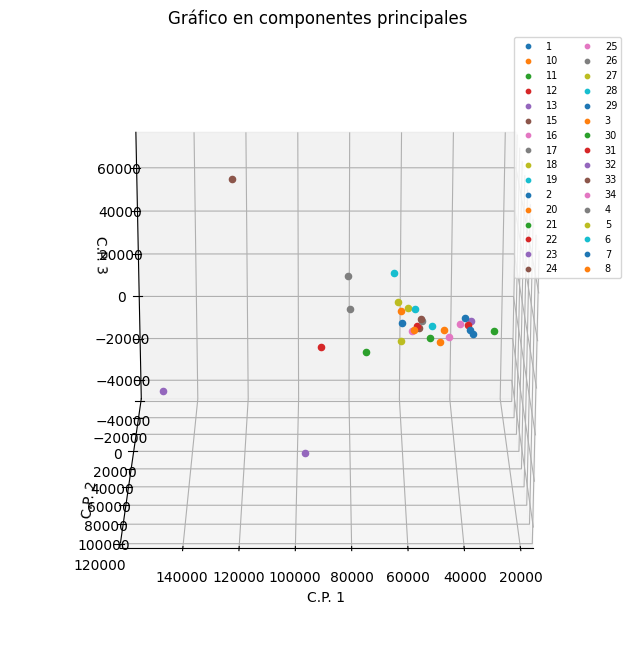

In [12]:
pca=PCA(8)
pca.fit(fftm)

print(f'dimenciones de la matriz de analisis: {pca.components_.shape}')

fig0=plt.figure(figsize=(33, 8))
ax=fig0.add_subplot(111,projection='3d',title='Gráfico en componentes principales')

for j in range (matrix.shape[0]):
    #PROYECCIONES DE CADA ARCHIVO DE AUDIO SOBRE COMPONENTES PRINCIPALES
    x = pca.components_[0] @ fftm[j,:].T #cambiando el valor numerico referente al vector de la matriz VT podemos cambiar la proyeccion sobre una componente principal
    y = pca.components_[1]@ fftm[j,:].T
    z = pca.components_[2] @ fftm[j,:].T

    ax.scatter(x,y,z,marker='o', label=wavs[j])

ax.legend(loc='upper right',ncols=2,fontsize=7,markerscale=0.7)
ax.set_xlabel('C.P. 1')
ax.set_ylabel('C.P. 2')
ax.set_zlabel('C.P. 3')


#for angle in range(0,360):
ax.view_init(20,90 )
#plt.draw()
#plt.pause(.01)
plt.show()

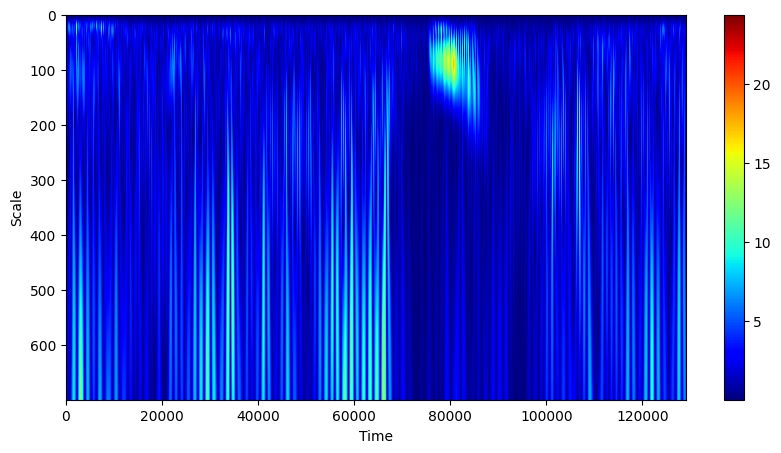

In [21]:
import pywt

wavelet = pywt.ContinuousWavelet('mexh')
scales = np.arange(1,700)

coef, freqs = pywt.cwt(Nmatrix[23], scales, wavelet)

plt.figure(figsize=(10, 5))
plt.imshow(np.abs(coef), aspect='auto', cmap='jet')
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('Scale')
plt.show()

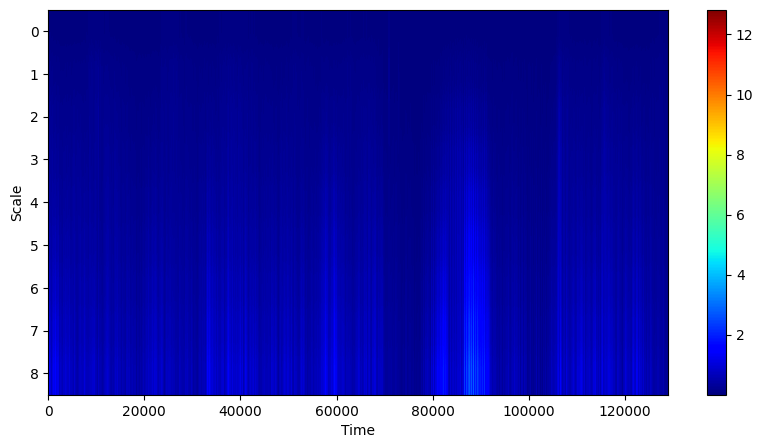

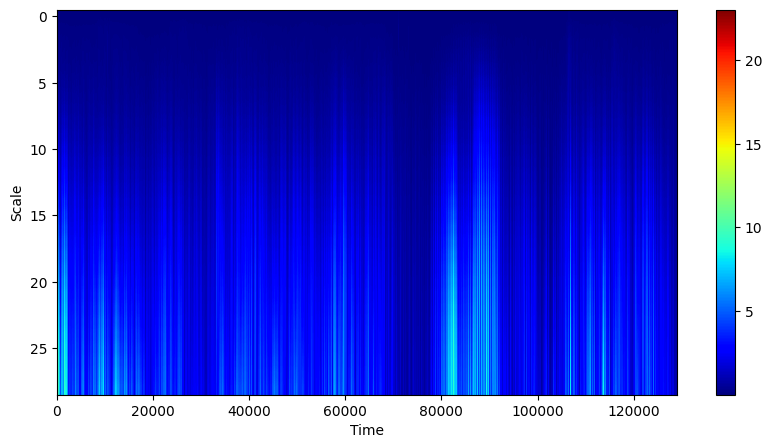

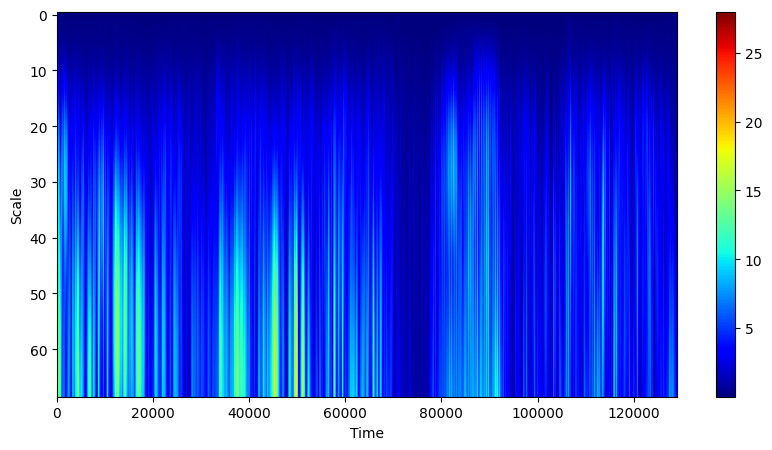

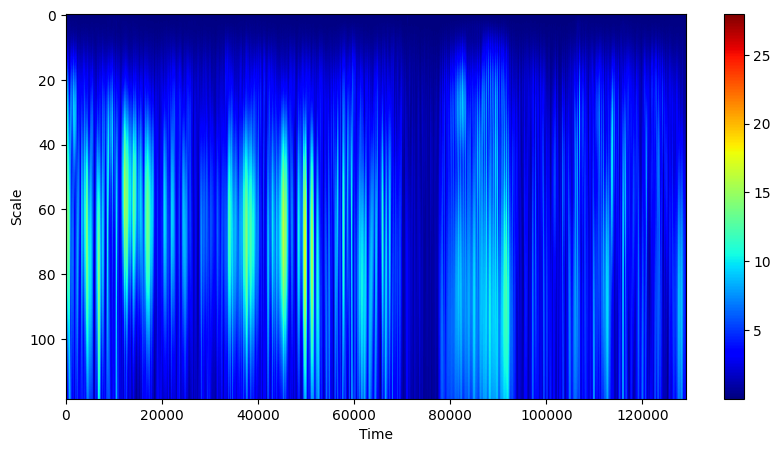

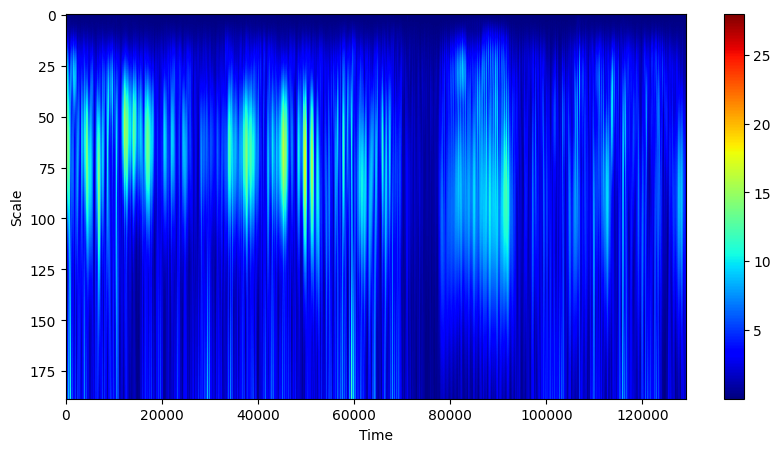

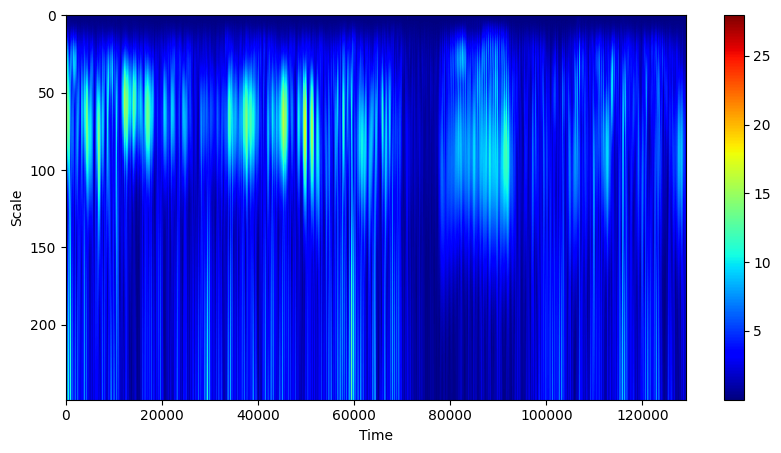

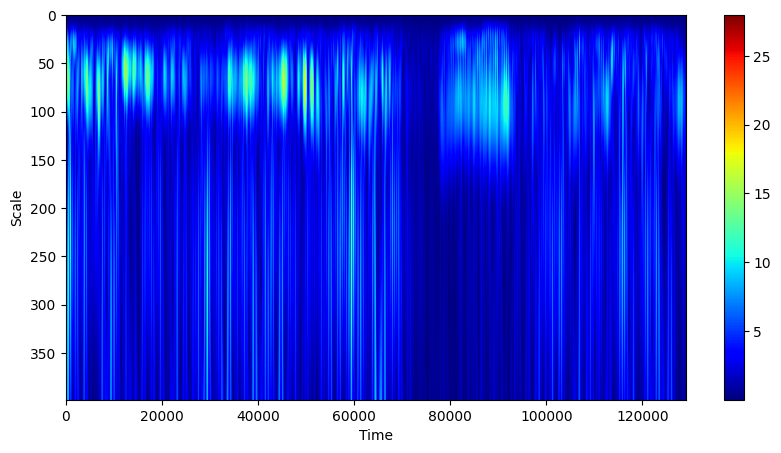

In [24]:
wavelet = pywt.ContinuousWavelet('mexh')

sca=[10,30,70,120,190,250,400]

for u in sca:
    scales = np.arange(1,u)
    coef, freqs = pywt.cwt(Nmatrix[15], scales, wavelet)


    plt.figure(figsize=(10, 5))
    plt.imshow(np.abs(coef), aspect='auto', cmap='jet')
    plt.colorbar()
    plt.xlabel('Time')
    plt.ylabel('Scale')
    plt.show()

In [61]:
scale = 85

mxht=[]

for u in Nmatrix:
    coef, freqs = pywt.cwt(u, scale, wavelet)
    mxht.append(coef[0])


mxhtm=np.stack( mxht, axis=0 )
print(mxhtm.shape)


(32, 129000)


dimenciones de la matriz de analisis: (8, 129000)


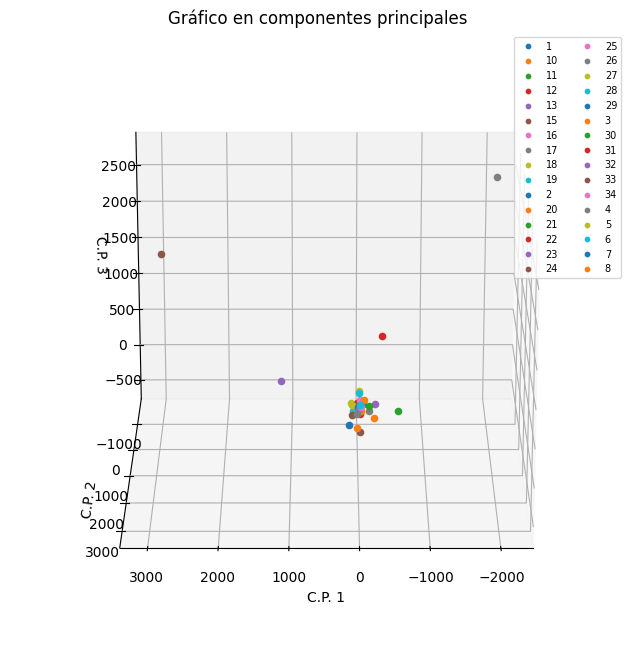

In [63]:
pca=PCA(8)
pca.fit(mxhtm)

print(f'dimenciones de la matriz de analisis: {pca.components_.shape}')


fig0=plt.figure(figsize=(33, 8))
ax=fig0.add_subplot(111,projection='3d',title='Gráfico en componentes principales')

for j in range (matrix.shape[0]):
    #PROYECCIONES DE CADA ARCHIVO DE AUDIO SOBRE COMPONENTES PRINCIPALES
    x = pca.components_[0] @ mxhtm[j,:].T #cambiando el valor numerico referente al vector de la matriz VT podemos cambiar la proyeccion sobre una componente principal
    y = pca.components_[1]@ mxhtm[j,:].T
    z = pca.components_[2] @ mxhtm[j,:].T

    ax.scatter(x,y,z,marker='o', label=wavs[j])

ax.legend(loc='upper right',ncols=2,fontsize=7,markerscale=0.7)
ax.set_xlabel('C.P. 1')
ax.set_ylabel('C.P. 2')
ax.set_zlabel('C.P. 3')


#for angle in range(0,360):
ax.view_init(20,90 )
#plt.draw()
#plt.pause(.01)
plt.show()

escogemos escala 85

se recomendo escala 52


para frecuencias bajas necesitamos menos resolucion temporal


usar funcion de normalizacionç

crear etiquetas

matriz volver real y sacar pcA

ojo caracter discreto de transformada
ojo wavelet con sombrero

revisar graficos de un solo audio

gabor transform
and the spectrogram
como cambian las frecuencias en cada instante de tiempo
armonicos en cada instante de tiempo

en wavelet voy cortando a mitdes y no partes iguales 

cambios y suavisados wavelet

wavelet filtro
furier
pca

ojo agrupameiento no sino tendencia o correlacion

ojo si es una clasficiacion o tendencias o lo que sea

depende del tipo de dato y que quiero usar metodos adecuadamente

ojo las soluciones que te da y como se interpreta
